In [1]:
# RFM - Recency, Frequency and Monetary

In [2]:
# unsupervised

In [3]:
#import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as seaborn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data  = pd.read_csv("E-com_Data.csv")

In [5]:
data.head(10)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN
5,4349.0,14618,397122.0,27-10-2017,1.0,12:43:00 PM,256.0,256.0,Location 1,NaN,NaN,NaN
6,4343.0,15364,368432.0,13-02-2017,-4.0,2:46:00 PM,922.0,-3688.0,Location 1,True,NaN,NaN
7,4341.0,85014B,377109.0,14-05-2017,3.0,9:22:00 AM,677.0,2031.0,Location 1,NaN,NaN,NaN
8,4341.0,85014A,377109.0,12-05-2017,3.0,9:22:00 AM,692.0,2076.0,Location 1,NaN,NaN,NaN
9,4341.0,85014B,390217.0,07-09-2017,6.0,2:47:00 PM,670.0,4020.0,Location 1,NaN,NaN,NaN


In [6]:
# !python --version

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [8]:
#data.isnull().sum()

In [9]:
data.value_counts()

Series([], dtype: int64)

In [10]:
data.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [11]:
print(data.isnull().sum()/len(data)*100)

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64


In [12]:
data.duplicated().sum()

3145

In [13]:
data = data.rename(columns = {"InvoieNo":"InvoiceNo","Date of purchase":"Date"})

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoiceNo          537979 non-null  float64
 3   Date               537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [15]:
data.isnull().sum()

CustomerID           136927
Item Code              3137
InvoiceNo              3137
Date                   3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [16]:
data = data.drop_duplicates(ignore_index=True)

In [17]:
data.isnull().sum()

CustomerID           133790
Item Code                 1
InvoiceNo                 1
Date                      1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64

In [18]:
data = data.dropna(subset=['CustomerID'])

In [19]:
data.isnull().sum()

CustomerID                0
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [20]:
data.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [21]:
data["Date"] = pd.to_datetime(data["Date"])

In [22]:
data.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoiceNo          404181 non-null  float64       
 3   Date               404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  float64       
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    object        
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 40.1+ MB


In [26]:
data.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [27]:
data['Date'].describe()#finding the latest date to calulate the Recency

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [28]:
import datetime as dt 

latest_date = dt.datetime(2017,12,20)

In [29]:
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [30]:
# Recency = Latest Date - last Invoice Date
# Frequency = Count of the number of times a particular customer has made a purchase
# Monetary = Sum of Total price per customer

In [31]:
data["Date_c"] = data['Date']

In [32]:
data.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date_c
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-05-10
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-12-10
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10


In [33]:
RFMScore = data.groupby('CustomerID').agg({'Date':lambda x:(latest_date - x.max()).days,
                                           'Date_c': lambda x: x.nunique(),
                                           'Price': lambda x:x.sum()})

In [34]:
RFMScore['Date_c'] = RFMScore['Date_c'].astype(int)

In [35]:
RFMScore.rename(columns={'Date':'Recency', 'Date_c':'Frequency', 'Price':'Monetary'}, inplace=True)

In [36]:
RFMScore.reset_index().sample(10)

,CustomerID,Recency,Frequency,Monetary
4234,4258.0,9,15,79473.0
961,969.0,81,10,144944.0
938,946.0,10,8,54495.0
2465,2479.0,107,2,15372.0
4313,4337.0,12,35,107479.0
2017,2027.0,5,10,31944.0
119,121.0,82,7,162800.0
1901,1911.0,298,6,237285.0
291,296.0,13,78,840450.0
806,814.0,10,11,324717.0


In [37]:
# Descriptive Analytics

# MEasure of Central tendencies and the measure of Variance

In [38]:
RFMScore.tail()

,Recency,Frequency,Monetary
CustomerID,,,
4368.0,17,7,20480.0
4369.0,181,6,10774.0
4370.0,12,11,24962.0
4371.0,4,132,280608.0
4372.0,51,23,262820.0


In [39]:
RFMScore.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

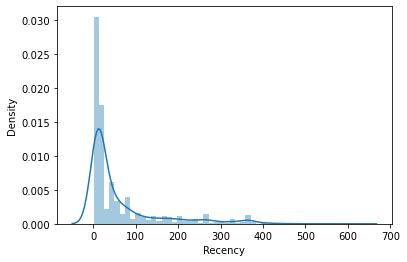

In [40]:
x = RFMScore['Recency']
ax = seaborn.distplot(x)

In [41]:
RFMScore.Frequency.describe()

count    4349.000000
mean       27.396643
std        33.594882
min         1.000000
25%         9.000000
50%        16.000000
75%        33.000000
max       378.000000
Name: Frequency, dtype: float64

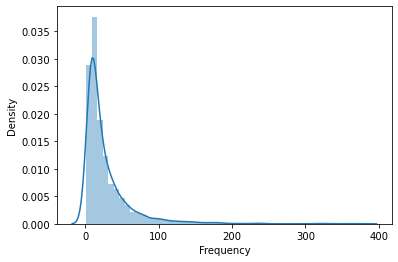

In [42]:
f = RFMScore['Frequency']
af = seaborn.distplot(f)

In [43]:
RFMScore.Monetary.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

In [44]:
data.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date_c
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-05-10
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-12-10
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10


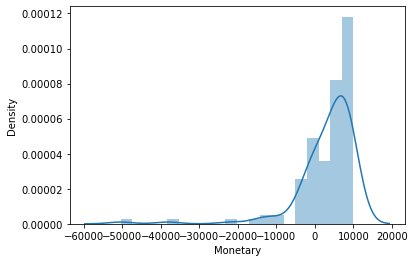

In [45]:
m = RFMScore.query('Monetary < 10000')['Monetary']
am = seaborn.distplot(m)

In [46]:
# Transformation Techiques

In [47]:
quantils = RFMScore.quantile(q=[0.25, 0.5, 0.75])
quantils = quantils.to_dict()

In [48]:
quantils

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [ ]:
#now we put in categories

In [49]:
# Function to create R, F and M segments

def Rscores(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def Fscores(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

# def Mscores(x,p,d):
#   if x <= d[p][0.25]:
#     return 4
#   elif x <= d[p][0.50]:
#     return 3
#   elif x <= d[p][0.75]:
#     return 2
#   else:
#     return 1

In [50]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [51]:
RFMScore['R'] = RFMScore['Recency'].apply(Rscores, args=('Recency', quantils))
RFMScore['F'] = RFMScore['Frequency'].apply(Fscores, args=('Frequency', quantils))
RFMScore['M'] = RFMScore['Monetary'].apply(Fscores, args=('Monetary', quantils))

In [52]:
RFMScore

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,4,2,1
4.0,20,10,176613.0,3,3,2
5.0,18,7,41976.0,2,4,3
6.0,9,42,151822.0,1,1,2
...,...,...,...,...,...,...
4368.0,17,7,20480.0,2,4,4
4369.0,181,6,10774.0,4,4,4
4370.0,12,11,24962.0,2,3,4


In [53]:
RFMScore.head(20)

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,4,2,1
4.0,20,10,176613.0,3,3,2
5.0,18,7,41976.0,2,4,3
6.0,9,42,151822.0,1,1,2
7.0,208,4,9410.0,4,4,4
8.0,234,10,135550.0,4,3,2
9.0,15,7,65832.0,2,4,3
10.0,16,22,331601.0,2,2,1


In [54]:
RFMScore['RFMGroup'] = RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)
RFMScore['RFMScore'] = RFMScore[['R','F','M']].sum(axis=1)

In [55]:
RFMScore.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3
3.0,77,18,257404.0,4,2,1,421,7
4.0,20,10,176613.0,3,3,2,332,8
5.0,18,7,41976.0,2,4,3,243,9
6.0,9,42,151822.0,1,1,2,112,4
7.0,208,4,9410.0,4,4,4,444,12
8.0,234,10,135550.0,4,3,2,432,9
9.0,15,7,65832.0,2,4,3,243,9
10.0,16,22,331601.0,2,2,1,221,5


In [56]:
Loyalty_level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScore.RFMScore, q=4, labels=Loyalty_level)
RFMScore["RFM_Loyalty_level"] = Score_cuts.values
RFMScore.reset_index().head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,2.0,4,63,553704.0,1,1,1,111,3,Platinum
1,3.0,77,18,257404.0,4,2,1,421,7,Gold
2,4.0,20,10,176613.0,3,3,2,332,8,Gold
3,5.0,18,7,41976.0,2,4,3,243,9,Silver
4,6.0,9,42,151822.0,1,1,2,112,4,Platinum
5,7.0,208,4,9410.0,4,4,4,444,12,Bronze
6,8.0,234,10,135550.0,4,3,2,432,9,Silver
7,9.0,15,7,65832.0,2,4,3,243,9,Silver
8,10.0,16,22,331601.0,2,2,1,221,5,Platinum
9,11.0,9,10,771439.0,1,3,1,131,5,Platinum


In [57]:
RFMScore[RFMScore['RFMGroup']=='111'].sort_values('Monetary', ascending = False).reset_index().head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,1704.0,3,235,35536194.0,1,1,1,111,3,Platinum
1,1896.0,2,356,17743855.0,1,1,1,111,3,Platinum
2,56.0,10,108,14357682.0,1,1,1,111,3,Platinum
3,1346.0,9,237,12647317.0,1,1,1,111,3,Platinum
4,3802.0,3,236,12319439.0,1,1,1,111,3,Platinum
5,4234.0,3,94,10654918.0,1,1,1,111,3,Platinum
6,1006.0,5,211,9351019.0,1,1,1,111,3,Platinum
7,3203.0,5,99,8102167.0,1,1,1,111,3,Platinum
8,2193.0,1,357,7966054.0,1,1,1,111,3,Platinum
9,1448.0,5,190,7892625.0,1,1,1,111,3,Platinum


In [58]:
#To handle the negative values

'''def handle_neg_to_zero(num):
  if num < 0:
    return 1
  else:
    return num

RFMScore['Recency'] = [handle_neg_to_zero(x) for x in RFMScore.Recency]
RFMScore['Recency'] = [handle_neg_to_zero(x) for x in RFMScore.Recency]
'''

"def handle_neg_to_zero(num):\n  if num < 0:\n    return 1\n  else:\n    return num\n\nRFMScore['Recency'] = [handle_neg_to_zero(x) for x in RFMScore.Recency]\nRFMScore['Recency'] = [handle_neg_to_zero(x) for x in RFMScore.Recency]\n"

In [59]:
RFMScore = RFMScore.reset_index()

In [60]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,2.0,4,63,553704.0,1,1,1,111,3,Platinum
1,3.0,77,18,257404.0,4,2,1,421,7,Gold
2,4.0,20,10,176613.0,3,3,2,332,8,Gold
3,5.0,18,7,41976.0,2,4,3,243,9,Silver
4,6.0,9,42,151822.0,1,1,2,112,4,Platinum


In [61]:
RFMScore1 = RFMScore.iloc[:,0:4]

In [62]:
RFMScore1

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0
...,...,...,...,...
4344,4368.0,17,7,20480.0
4345,4369.0,181,6,10774.0
4346,4370.0,12,11,24962.0
4347,4371.0,4,132,280608.0


In [63]:
# Normalisation- No Outliers, sensitive to the outliers
# Standardisation- Outliers
# Min Max Scalar - Image related data

K Means

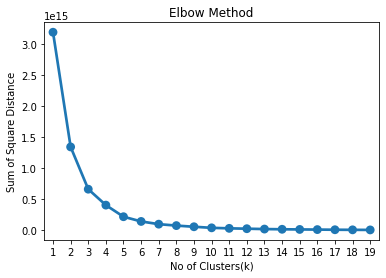

In [64]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}

for k in range(1,20):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=500)
  km = km.fit(RFMScore1)
  sum_of_sq_dist[k] = km.inertia_

seaborn.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel("No of Clusters(k)")
plt.ylabel("Sum of Square Distance")
plt.title("Elbow Method")
plt.show()

In [65]:
km_cluster = KMeans(n_clusters=6, init='k-means++', max_iter=500)
km_cluster.fit(RFMScore1)

KMeans(max_iter=500, n_clusters=6)

In [66]:
RFMScore['Cluster'] = km_cluster.labels_
RFMScore.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level,Cluster
0,2.0,4,63,553704.0,1,1,1,111,3,Platinum,5
1,3.0,77,18,257404.0,4,2,1,421,7,Gold,0
2,4.0,20,10,176613.0,3,3,2,332,8,Gold,0
3,5.0,18,7,41976.0,2,4,3,243,9,Silver,0
4,6.0,9,42,151822.0,1,1,2,112,4,Platinum,0
5,7.0,208,4,9410.0,4,4,4,444,12,Bronze,0
6,8.0,234,10,135550.0,4,3,2,432,9,Silver,0
7,9.0,15,7,65832.0,2,4,3,243,9,Silver,0
8,10.0,16,22,331601.0,2,2,1,221,5,Platinum,5
9,11.0,9,10,771439.0,1,3,1,131,5,Platinum,5


In [67]:
# .to_csv()